We'll start by importing all the tools we need:

In [1]:
!pip install seaborn pandas scikit-learn pyarrow
!python3 -m pip install --upgrade pip

In [2]:
import numpy as np

# data processing
import pandas as pd


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
#metrics calculation
from sklearn import metrics

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

Creating our pandas data frame; this will help us get an idea of our data's properties.

In [4]:
data = pd.read_csv('Data.csv')

In [5]:
data.head(10)

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.200000,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.140000,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.050000,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.200000,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.200000,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False
5,0.0,0.0,0.0,0.0,3.0,738.000000,0.00,0.022222,0.0,0.4,...,4.0,1.0,2.0,Returning_Visitor,Female,Required,Not Specified,Other,0.0,False
6,0.0,0.0,0.0,0.0,3.0,395.000000,0.00,0.066667,0.0,0.0,...,1.0,3.0,3.0,Returning_Visitor,Female,ALL,Diploma,Married,0.0,False
7,0.0,0.0,0.0,0.0,7.0,280.500000,0.00,0.028571,0.0,0.0,...,1.0,1.0,3.0,Returning_Visitor,Female,Deny,Diploma,Other,0.0,False
8,0.0,0.0,0.0,0.0,6.0,98.000000,0.00,0.066667,0.0,0.0,...,5.0,1.0,3.0,Returning_Visitor,Not Specified,Deny,Graduate,Single,0.0,False
9,0.0,0.0,0.0,0.0,2.0,68.000000,0.00,0.100000,0.0,0.0,...,2.0,3.0,3.0,Returning_Visitor,Male,Required,Diploma,Single,0.0,False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

As we can see we have some missing values.

In [7]:
data.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


Let's take note of some variables with high standard deviation values: HomePage_Duration, LandingPage_Duration, ProductDescriptionPage_Duration, ProductDescriptionPage_Duration, GoogleMetric:Page Values. Notice the differences between mean and median - the distribution of data in a quite a few columns is skewed. Notice also that in a few columns the interquantile range will end up quite small in comparison to the maximum value recorded. That means that there is a risk of ending up with a LOT of outliers (at least according to the Tukey rule). As such we will normalize the data.

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[["HomePage", "HomePage_Duration", "LandingPage", "LandingPage_Duration", "ProductDescriptionPage", "ProductDescriptionPage_Duration", "GoogleMetric:Bounce Rates", "GoogleMetric:Exit Rates", "GoogleMetric:Page Values", "SeasonalPurchase", "OS", "SearchEngine", "Zone", "Type of Traffic", "WeekendPurchase" ]] = scaler.fit_transform(data[["HomePage", "HomePage_Duration", "LandingPage", "LandingPage_Duration", "ProductDescriptionPage", "ProductDescriptionPage_Duration", "GoogleMetric:Bounce Rates", "GoogleMetric:Exit Rates", "GoogleMetric:Page Values", "SeasonalPurchase", "OS", "SearchEngine", "Zone", "Type of Traffic", "WeekendPurchase" ]])

In [9]:
#Let's take a look at the values of our categorical variables:
data.Month_SeasonalPurchase.unique() #label

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec', nan], dtype=object)

In [10]:
data.CustomerType.unique() #one-hot - pb want to use as predictor

array(['Returning_Visitor', 'New_Visitor', 'Other', nan], dtype=object)

In [11]:
data.Gender.unique()  #one-hot pb want to use as predictor

array(['Not Specified', 'Female', 'Male', nan], dtype=object)

In [12]:
data["Cookies Setting"].unique() #label

array(['Deny', 'ALL', 'Required', nan], dtype=object)

In [13]:
data.Education.unique() #label

array(['Not Specified', 'Others', 'Diploma', 'Graduate', nan],
      dtype=object)

In [14]:
data["Marital Status"].unique() #label

array(['Other', 'Married', 'Single', nan], dtype=object)

<Axes: >

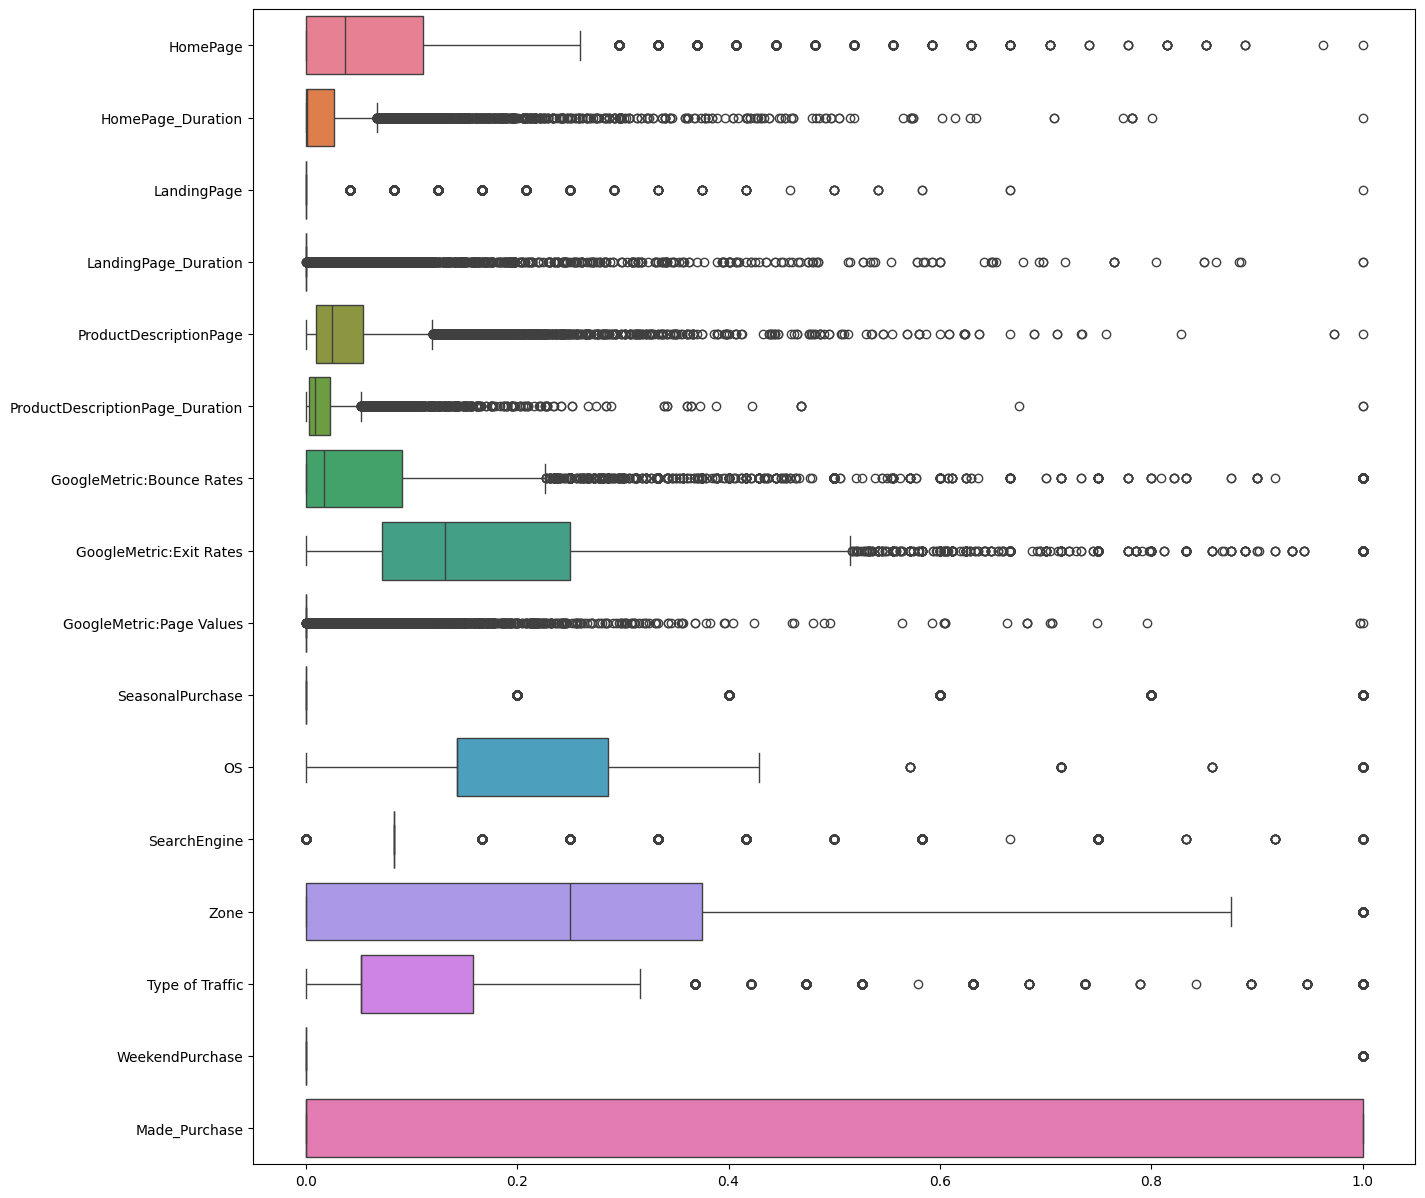

In [15]:
from matplotlib import axes
plt.figure(figsize=(15,15))
sns.boxplot(data,orient='h')

As we can see we have a significant number of outliers. Let's eliminate those before we start dealing with the missing values. Keeping outliers in the dataset while dealing with missing values can lead to skewing the data, and that is not desirable.

In [16]:
data['Made_Purchase'] = data['Made_Purchase'].replace({True: 'True', False: 'False'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [17]:
Q1_prod_desc_dur = data["ProductDescriptionPage_Duration"].quantile(0.25) #numeric_only=True)
Q3_prod_desc_dur = data["ProductDescriptionPage_Duration"].quantile(0.75) #numeric_only=True)
IQR_prod_desc_dur = Q3_prod_desc_dur - Q1_prod_desc_dur
cond_prod_desc_dur = ( (data["ProductDescriptionPage_Duration"]< Q1_prod_desc_dur - 1.5*IQR_prod_desc_dur) | (data["ProductDescriptionPage_Duration"] > Q3_prod_desc_dur + 1.5*IQR_prod_desc_dur)) 

In [18]:
Q1_hp = data["HomePage"].quantile(0.25) #numeric_only=True)
Q3_hp = data["HomePage"].quantile(0.75) #numeric_only=True)
IQR_hp = Q3_hp - Q1_hp
cond_hp = ( (data["HomePage"]< Q1_hp - 1.5*IQR_hp) | (data["HomePage"] > Q3_hp + 1.5*IQR_hp)) 

In [19]:
Q1_hp_dur = data["HomePage_Duration"].quantile(0.25) #numeric_only=True)
Q3_hp_dur = data["HomePage_Duration"].quantile(0.75) #numeric_only=True)
IQR_hp_dur = Q3_hp_dur - Q1_hp_dur
cond_hp_dur = ( (data["HomePage_Duration"]< Q1_hp_dur - 1.5*IQR_hp_dur) | (data["HomePage_Duration"] > Q3_hp_dur + 1.5*IQR_hp_dur)) 

In [20]:
Q1_lp = data["LandingPage"].quantile(0.25) #numeric_only=True)
Q3_lp = data["LandingPage"].quantile(0.75) #numeric_only=True)
IQR_lp = Q3_lp - Q1_lp
cond_lp = ( (data["LandingPage"]< Q1_lp - 1.5*IQR_lp) | (data["LandingPage"] > Q3_lp + 1.5*IQR_lp)) 

In [21]:
Q1_lp_dur = data["LandingPage_Duration"].quantile(0.25) #numeric_only=True)
Q3_lp_dur = data["LandingPage_Duration"].quantile(0.75) #numeric_only=True)
IQR_lp_dur = Q3_lp_dur - Q1_lp_dur
cond_lp_dur = ( (data["LandingPage_Duration"]< Q1_lp_dur - 1.5*IQR_lp_dur) | (data["LandingPage_Duration"] > Q3_lp_dur + 1.5*IQR_lp_dur)) 

In [22]:
Q1_prod_desc = data["ProductDescriptionPage"].quantile(0.25) #numeric_only=True)
Q3_prod_desc = data["ProductDescriptionPage"].quantile(0.75) #numeric_only=True)
IQR_prod_desc = Q3_prod_desc - Q1_prod_desc
cond_prod_desc = ( (data["ProductDescriptionPage"]< Q1_prod_desc - 1.5*IQR_prod_desc) | (data["ProductDescriptionPage"] > Q3_prod_desc + 1.5*IQR_prod_desc)) 

In [23]:
Q1_gm_br = data["GoogleMetric:Bounce Rates"].quantile(0.25) #numeric_only=True)
Q3_gm_br = data["GoogleMetric:Bounce Rates"].quantile(0.75) #numeric_only=True)
IQR_gm_br = Q3_gm_br - Q1_gm_br
cond_gm_br = ( (data["GoogleMetric:Bounce Rates"]< Q1_gm_br - 1.5*IQR_gm_br) | (data["GoogleMetric:Bounce Rates"] > Q3_gm_br + 1.5*IQR_gm_br)) 

In [24]:
Q1_gm_er = data["GoogleMetric:Exit Rates"].quantile(0.25) #numeric_only=True)
Q3_gm_er = data["GoogleMetric:Exit Rates"].quantile(0.75) #numeric_only=True)
IQR_gm_er = Q3_gm_er - Q1_gm_er
cond_gm_exr = ( (data["GoogleMetric:Exit Rates"]< Q1_gm_er - 1.5*IQR_gm_er) | (data["GoogleMetric:Exit Rates"] > Q3_gm_er + 1.5*IQR_gm_er)) 

In [25]:
Q1_gm_pv = data["GoogleMetric:Page Values"].quantile(0.25) #numeric_only=True)
Q3_gm_pv = data["GoogleMetric:Page Values"].quantile(0.75) #numeric_only=True)
IQR_gm_pv = Q3_gm_pv - Q1_gm_pv
cond_gm_pv = ( (data["GoogleMetric:Page Values"]< Q1_gm_pv - 1.5*IQR_gm_pv) | (data["GoogleMetric:Page Values"] > Q3_gm_pv + 1.5*IQR_gm_pv)) 

In [26]:
Q1_sp = data["SeasonalPurchase"].quantile(0.25) #numeric_only=True)
Q3_sp = data["SeasonalPurchase"].quantile(0.75) #numeric_only=True)
IQR_sp = Q3_sp - Q1_sp
cond_sp = ( (data["SeasonalPurchase"]< Q1_sp - 1.5*IQR_sp) | (data["SeasonalPurchase"] > Q3_sp + 1.5*IQR_sp)) 

In [27]:
Q1_os = data["OS"].quantile(0.25) #numeric_only=True)
Q3_os = data["OS"].quantile(0.75) #numeric_only=True)
IQR_os = Q3_os - Q1_os
cond_os = ( (data["OS"]< Q1_os - 1.5*IQR_os) | (data["OS"] > Q3_os + 1.5*IQR_os)) 

In [28]:
Q1_se = data["SearchEngine"].quantile(0.25) #numeric_only=True)
Q3_se = data["SearchEngine"].quantile(0.75) #numeric_only=True)
IQR_se = Q3_se - Q1_se
cond_se = ( (data["SearchEngine"]< Q1_se - 1.5*IQR_se) | (data["SearchEngine"] > Q3_se + 1.5*IQR_se)) 

In [29]:
Q1_zone = data["Zone"].quantile(0.25) #numeric_only=True)
Q3_zone = data["Zone"].quantile(0.75) #numeric_only=True)
IQR_zone = Q3_zone - Q1_zone
cond_zone = ( (data["Zone"]< Q1_zone - 1.5*IQR_zone) | (data["Zone"] > Q3_zone + 1.5*IQR_zone)) 

In [30]:
Q1_tot = data["Type of Traffic"].quantile(0.25) #numeric_only=True)
Q3_tot = data["Type of Traffic"].quantile(0.75) #numeric_only=True)
IQR_tot = Q3_tot - Q1_tot
cond_tot = ( (data["Type of Traffic"]< Q1_tot - 1.5*IQR_tot) | (data["Type of Traffic"] > Q3_tot + 1.5*IQR_tot)) 

In [31]:
Q1_wp = data["WeekendPurchase"].quantile(0.25) #numeric_only=True)
Q3_wp = data["WeekendPurchase"].quantile(0.75) #numeric_only=True)
IQR_wp = Q3_wp - Q1_wp
cond_wp = ( (data["WeekendPurchase"]< Q1_wp - 1.5*IQR_wp) | (data["WeekendPurchase"] > Q3_wp + 1.5*IQR_wp)) 

In [32]:
#data = data[~(cond_prod_desc_dur| cond_hp | cond_hp_dur | cond_lp | cond_lp_dur | cond_prod_desc | cond_gm_br | cond_gm_exr | cond_gm_pv | cond_sp | cond_os | cond_se | cond_zone | cond_tot | cond_wp)]

In [33]:
#data = data[~(cond_prod_desc_dur| cond_hp | cond_hp_dur | cond_prod_desc | cond_gm_br | cond_gm_exr | cond_sp | cond_os | cond_se | cond_zone | cond_tot | cond_wp)]

In [34]:
data = data[~(cond_gm_exr  | cond_os )]

We're only keeping a couple of the column-specific conditions pertaining to outlier elimination (Tukey's rule), otherwise we would have to take out too many data points (i.e. rows in the data frame).

In [35]:
#data = data[~(cond_prod_desc_dur)] #for unscaled data

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13205 entries, 2 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         13065 non-null  float64
 1   HomePage_Duration                13075 non-null  float64
 2   LandingPage                      13066 non-null  float64
 3   LandingPage_Duration             13083 non-null  float64
 4   ProductDescriptionPage           13097 non-null  float64
 5   ProductDescriptionPage_Duration  13059 non-null  float64
 6   GoogleMetric:Bounce Rates        13079 non-null  float64
 7   GoogleMetric:Exit Rates          13077 non-null  float64
 8   GoogleMetric:Page Values         13084 non-null  float64
 9   SeasonalPurchase                 13072 non-null  float64
 10  Month_SeasonalPurchase           13072 non-null  object 
 11  OS                               13085 non-null  float64
 12  SearchEngine           

<Axes: >

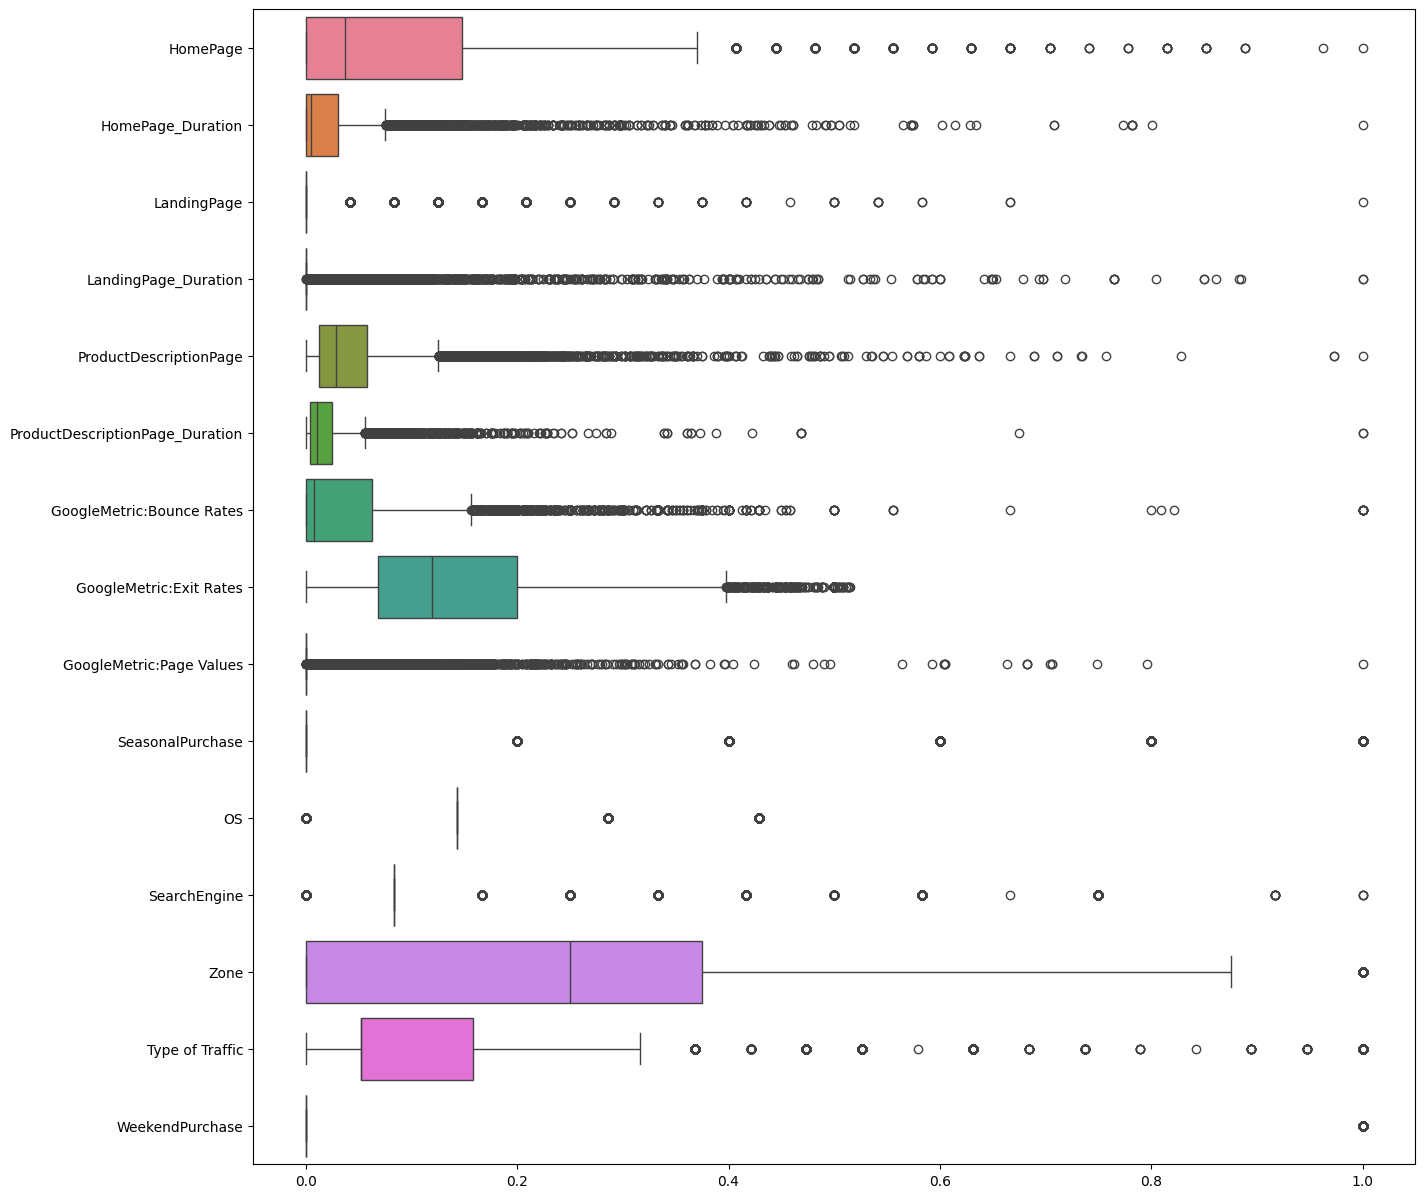

In [37]:
plt.figure(figsize=(15,15))
sns.boxplot(data,orient='h')

We have eliminated outliers to a satisfying degree. Let us now move on to dealing with the missing values. We will then proceed to properly encode our categorical data columns and then apply our machine learning algorithms, i.e. logistic regression, random forest etc.

In [38]:
data["HomePage"]= data["HomePage"].interpolate(direction='forward')

In [39]:
data["HomePage_Duration"]=data["HomePage_Duration"].interpolate(direction='forward')

In [40]:
data["LandingPage"]=data["LandingPage"].interpolate(direction='forward')

In [41]:
data["LandingPage_Duration"]=data["LandingPage_Duration"].interpolate(direction='forward')

In [42]:
data["ProductDescriptionPage"]=data["ProductDescriptionPage"].interpolate(direction='forward')

In [43]:
data["ProductDescriptionPage_Duration"]=data["ProductDescriptionPage_Duration"].interpolate(direction='forward')

In [44]:
data["GoogleMetric:Bounce Rates"]=data["GoogleMetric:Bounce Rates"].interpolate(direction='forward')

In [45]:
data["GoogleMetric:Exit Rates"]=data["GoogleMetric:Exit Rates"].interpolate(direction='forward')

In [46]:
data["GoogleMetric:Page Values"]=data["GoogleMetric:Page Values"].interpolate(direction='forward')

In [47]:
data["SeasonalPurchase"]=data["SeasonalPurchase"].interpolate(direction='forward')

In [48]:
data["Month_SeasonalPurchase"]=data["Month_SeasonalPurchase"].ffill()

In [49]:
data["OS"]=data["OS"].interpolate(direction='forward')

In [50]:
data["SearchEngine"]=data["SearchEngine"].interpolate(direction='forward')

In [51]:
data["Zone"]=data["Zone"].interpolate(direction='forward')

In [52]:
data["Type of Traffic"]=data["Type of Traffic"].interpolate(direction='forward')

In [53]:
data["CustomerType"]=data["CustomerType"].ffill()

In [54]:
data["Gender"]=data["Gender"].ffill()

In [55]:
data["Cookies Setting"]=data["Cookies Setting"].ffill()

In [56]:
data["Education"]=data["Education"].ffill()

In [57]:
data["Marital Status"]=data["Marital Status"].ffill()

In [58]:
data["WeekendPurchase"]=data["WeekendPurchase"].interpolate(direction='forward')

In [59]:
data["Made_Purchase"]=data["Made_Purchase"].ffill()

We've used forward fill for the categorical data and interpolation for the numerical data.

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13205 entries, 2 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         13205 non-null  float64
 1   HomePage_Duration                13205 non-null  float64
 2   LandingPage                      13205 non-null  float64
 3   LandingPage_Duration             13205 non-null  float64
 4   ProductDescriptionPage           13205 non-null  float64
 5   ProductDescriptionPage_Duration  13205 non-null  float64
 6   GoogleMetric:Bounce Rates        13205 non-null  float64
 7   GoogleMetric:Exit Rates          13205 non-null  float64
 8   GoogleMetric:Page Values         13205 non-null  float64
 9   SeasonalPurchase                 13205 non-null  float64
 10  Month_SeasonalPurchase           13205 non-null  object 
 11  OS                               13205 non-null  float64
 12  SearchEngine           

Now that we've eliminated outliers and addressed the missing data, let's see some plots.

<Axes: xlabel='HomePage', ylabel='Count'>

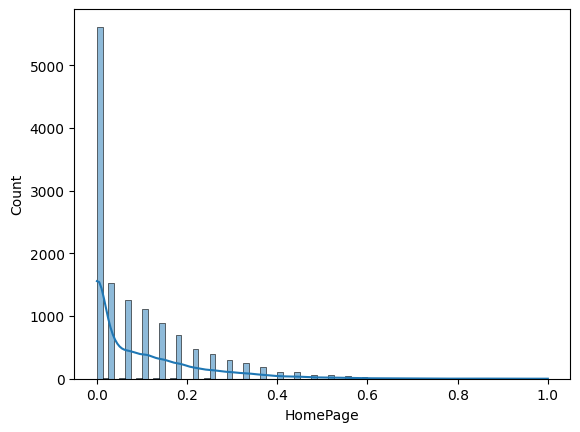

In [61]:
sns.histplot(data=data, x="HomePage", kde=True)

<Axes: xlabel='HomePage_Duration', ylabel='Count'>

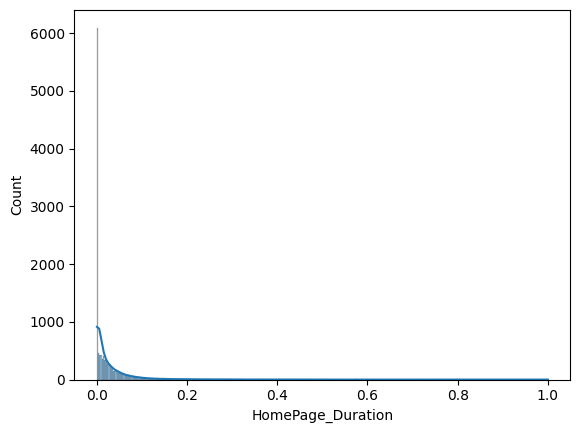

In [62]:
sns.histplot(data=data, x="HomePage_Duration", kde=True)

<Axes: xlabel='LandingPage', ylabel='Count'>

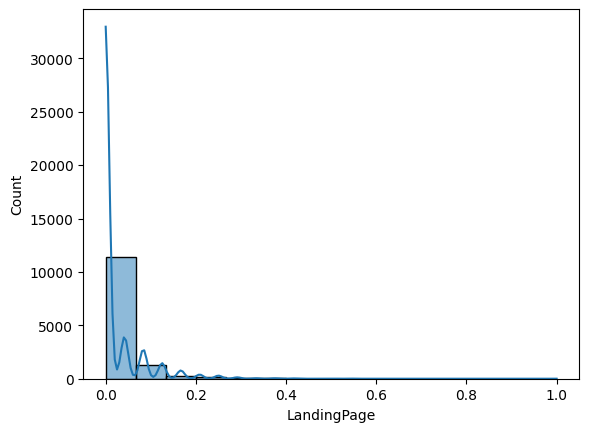

In [63]:
sns.histplot(data=data, x="LandingPage", kde=True)

<Axes: xlabel='LandingPage_Duration', ylabel='Count'>

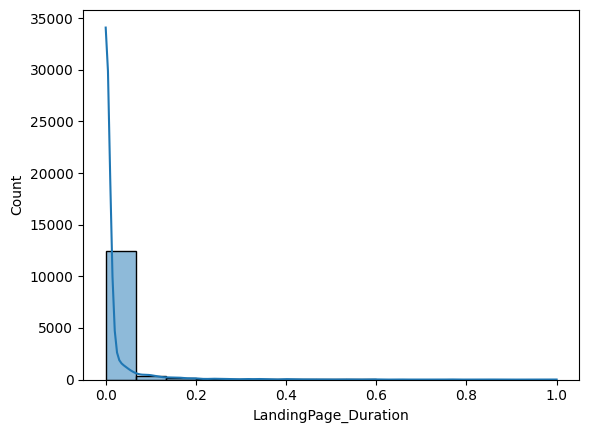

In [64]:
sns.histplot(data=data, x="LandingPage_Duration", kde=True)

As we can see, the data distribution in some columns is very skewed. 

<Axes: xlabel='OS', ylabel='Count'>

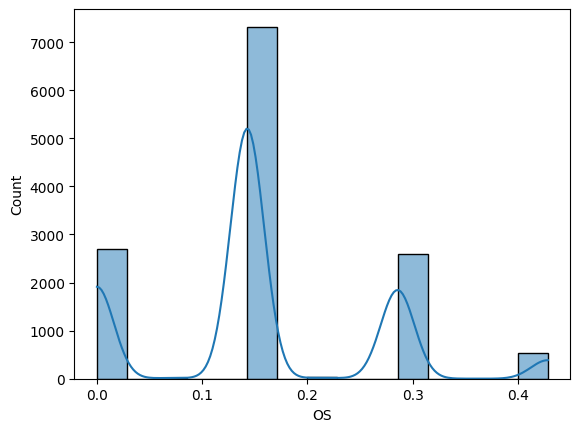

In [65]:
sns.histplot(data=data, x="OS", kde=True)

<Axes: xlabel='SearchEngine', ylabel='Count'>

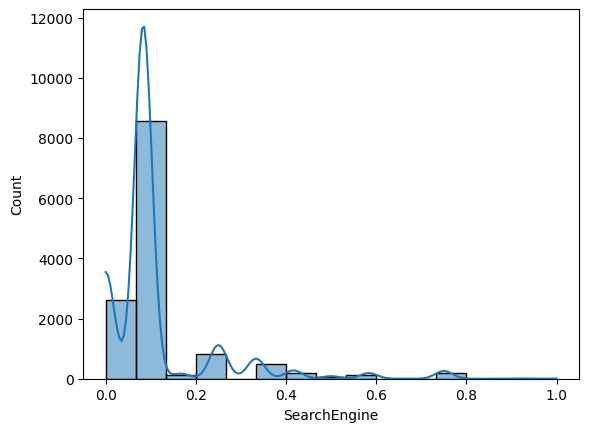

In [66]:
sns.histplot(data=data, x="SearchEngine", kde=True)

<Axes: xlabel='GoogleMetric:Bounce Rates', ylabel='Count'>

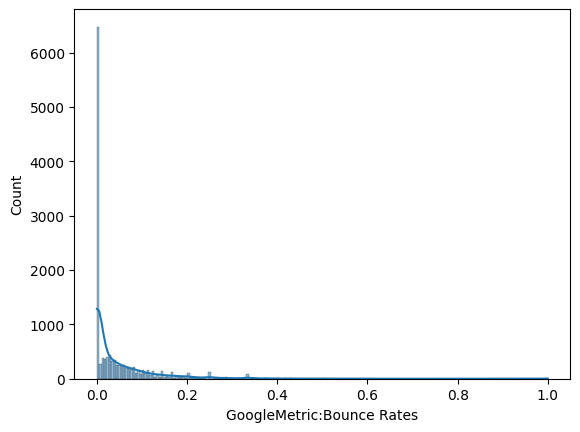

In [67]:
sns.histplot(data=data, x="GoogleMetric:Bounce Rates", kde=True)

<Axes: xlabel='GoogleMetric:Exit Rates', ylabel='Count'>

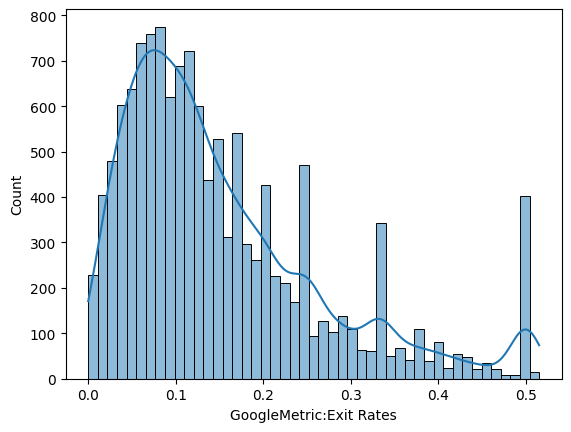

In [68]:
sns.histplot(data=data, x="GoogleMetric:Exit Rates", kde=True)

More skewed distributions. The GoogleMetric: Exit Rates does seem to behave better than what we've seen in the previous examples.

<Axes: xlabel='GoogleMetric:Page Values', ylabel='Count'>

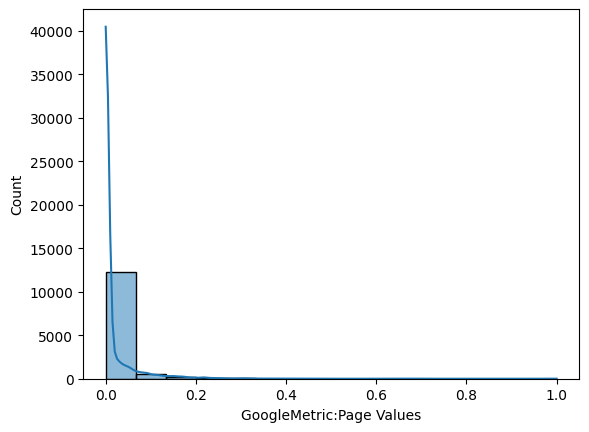

In [69]:
sns.histplot(data=data, x="GoogleMetric:Page Values", kde=True)

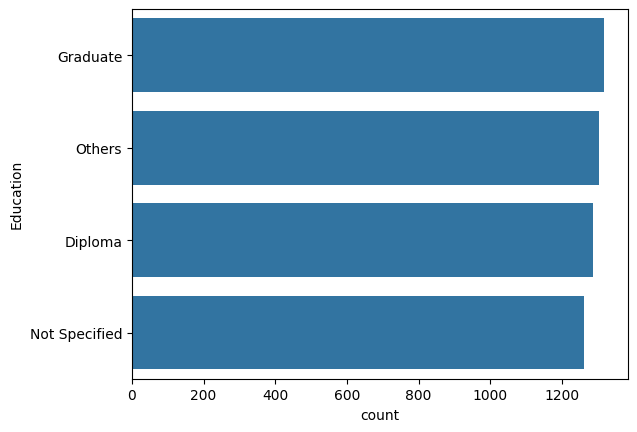

In [70]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='True'], y='Education', order=data[data['Made_Purchase']=='True']['Education'].value_counts().index)

Count plot of purchases made, grouped by education level. The graduate level is in the first position with most numerous purchases, but the differences aren't that high.

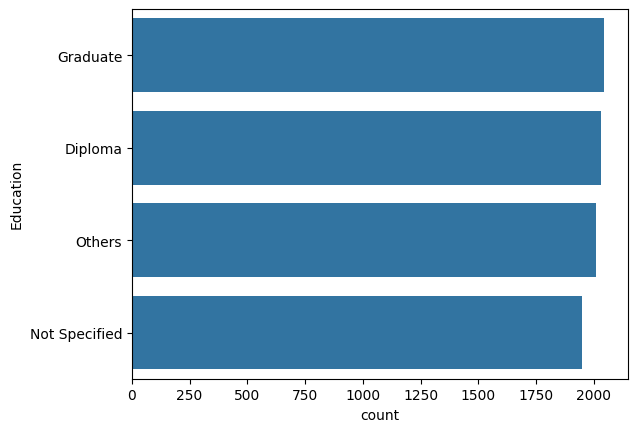

In [71]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='False'], y='Education', order=data[data['Made_Purchase']=='False']['Education'].value_counts().index)

Count plot of situations when a purchase was NOT made, grouped by education level. Once again Graduate is in pole position, but the differences are, again, not very high. The overall values are higher than before, indicating that, per every education level there are more situations when a purchase is not made.

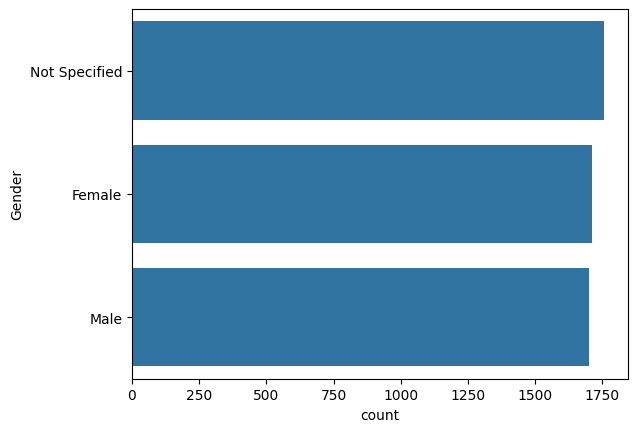

In [72]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='True'], y='Gender', order=data[data['Made_Purchase']=='True']['Gender'].value_counts().index)

Count plot of purchases made, grouped by gender. The "Not specified" category is associated with the highest number of purchases, but the differences compared to Male and Female are not very large.

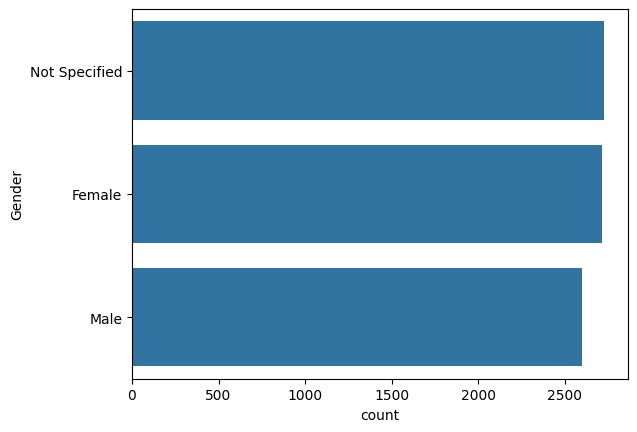

In [73]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='False'], y='Gender', order=data[data['Made_Purchase']=='False']['Gender'].value_counts().index)

Count plot of situations when a purchase was not made, grouped by gender. Much like before, the "Not specified" category is in first place. There is a more noticeable difference between the Male and Female categories this time.

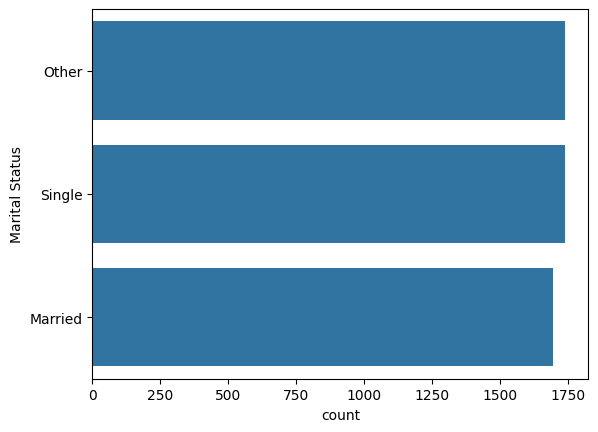

In [74]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='True'], y='Marital Status', order=data[data['Made_Purchase']=='True']['Marital Status'].value_counts().index)

Count plot of purchases made, grouped by marital status. The Other category is associated with the highest number of purchases, but the differences compared to Single and Marries are not very large. Single does display a slightly higher count than Married does.

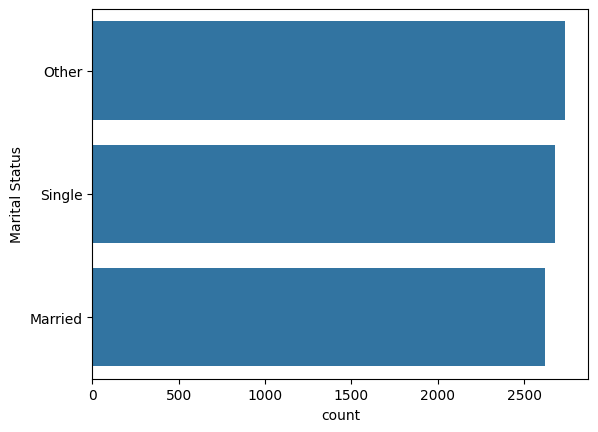

In [75]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='False'], y='Marital Status', order=data[data['Made_Purchase']=='False']['Marital Status'].value_counts().index)

Count plot of situations when a purchase was not made, grouped by gender. The differences are still not very large but the order is bit more clearly noticeable.

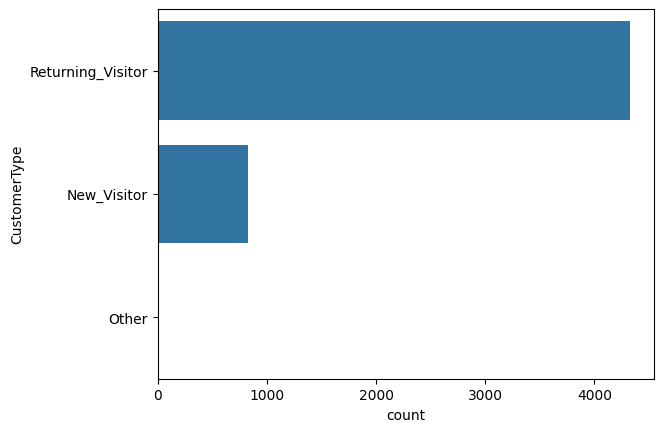

In [76]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='True'], y='CustomerType', order=data[data['Made_Purchase']=='True']['CustomerType'].value_counts().index)

Count plot of purchases made, grouped by customer type. Here we see significant differences between Returning Visitor, New Visitor and Other. The Returning Visitor category displays by far the highest count. This indicates that returning visitors are more likely to make a purchase.

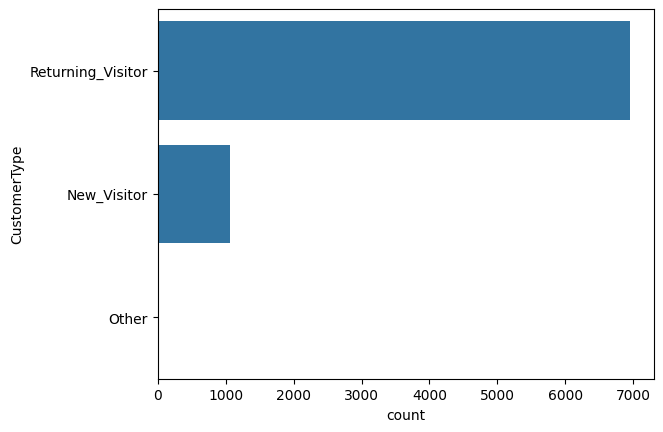

In [77]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='False'], y='CustomerType', order=data[data['Made_Purchase']=='False']['CustomerType'].value_counts().index)

Count plot of situations when a purchase was not made, grouped by customer type. As before, the Returning Visitor category displays the highest count by a wide margin.

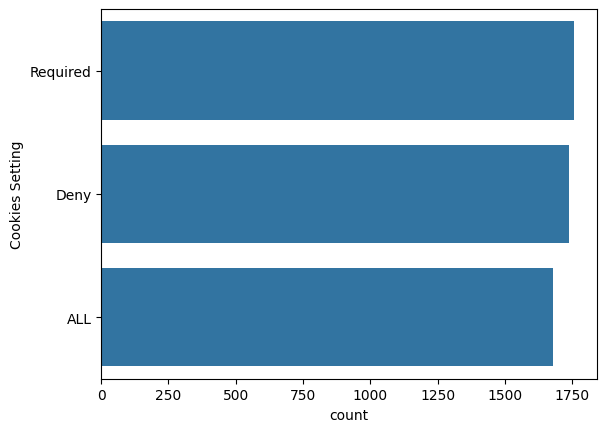

In [78]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='True'], y='Cookies Setting', order=data[data['Made_Purchase']=='True']['Cookies Setting'].value_counts().index)

Count plot of purchases made, grouped by cookies setting. The Required option seems to be most preferred one.

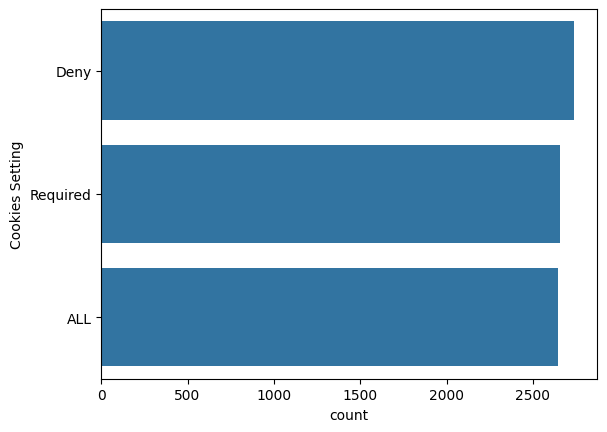

In [79]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='False'], y='Cookies Setting', order=data[data['Made_Purchase']=='False']['Cookies Setting'].value_counts().index)

Count plot of situations when a purchase was not made, grouped by cookies setting. This time the Deny category took the first position. Perhaps the Cookies Setting variable can prove to be useful predictor of whether or not a cusomer chooses to make a purchase or not. We should keep in mind that in both cases (purchases made and NOT made) the differences between categories were not very large. 

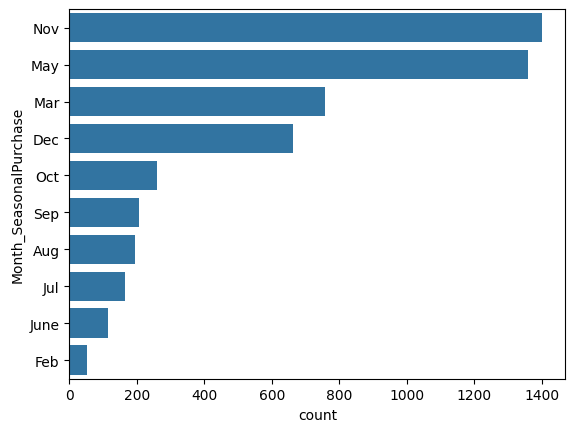

In [80]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='True'], y='Month_SeasonalPurchase', order=data[data['Made_Purchase']=='True']['Month_SeasonalPurchase'].value_counts().index)

Count plot of purchases made, grouped by month. November, May, March and December take the first places. November and December are linked to the winter holidays, in March we have the International Women's Day. As for May, perhaps some national holidays are linked to it. 

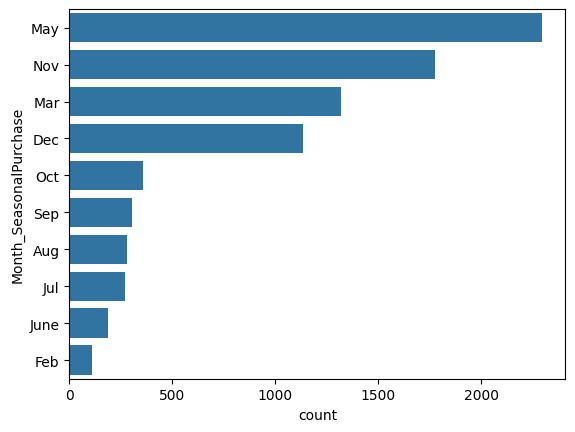

In [81]:
g=sns.countplot(orient='h', data=data[data['Made_Purchase']=='False'], y='Month_SeasonalPurchase', order=data[data['Made_Purchase']=='False']['Month_SeasonalPurchase'].value_counts().index)

Count plot of situations when a purchase was not made, grouped by month. The same months take the first positions, albeit in a different order. It makes sense, as when one buys a present for a loved one, one typically takes great care and mulls over the decision.

In [82]:
#converting categorical into numerical with LabelEncoder
labelencoder = LabelEncoder()
data['Month_SeasonalPurchase'] = labelencoder.fit_transform(data['Month_SeasonalPurchase'])
data['Cookies Setting'] = labelencoder.fit_transform(data['Cookies Setting'])
data['Education'] = labelencoder.fit_transform(data['Education'])
data['Marital Status'] = labelencoder.fit_transform(data['Marital Status'])

#Normalize the newly encoded data:
data[[ "Month_SeasonalPurchase", "Cookies Setting", "Education", "Marital Status" ]] = scaler.fit_transform(data[[ "Month_SeasonalPurchase", "Cookies Setting", "Education", "Marital Status" ]])

#converting categorical into numerical - one-hot encoding
encoded_columns_ct = pd.get_dummies(data['CustomerType'])
data = data.join(encoded_columns_ct).drop('CustomerType', axis=1)

encoded_columns_g = pd.get_dummies(data['Gender'])
data = data.join(encoded_columns_g).drop('Gender', axis=1)
data.drop(['Other', 'Not Specified'], axis=1, inplace=True)

In [83]:
#convert the object and bool data to numerical:
data['Made_Purchase'] = data['Made_Purchase'].replace({'True':1, 'False':0})

/tmp/ipykernel_7164/2748595867.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Made_Purchase'] = data['Made_Purchase'].replace({'True':1, 'False':0})


In [84]:
data['New_Visitor'] = data['New_Visitor'].replace({True:1, False:0})

/tmp/ipykernel_7164/2731345693.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['New_Visitor'] = data['New_Visitor'].replace({True:1, False:0})


In [85]:
data['Returning_Visitor'] = data['Returning_Visitor'].replace({True:1, False:0})

/tmp/ipykernel_7164/1903811957.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Returning_Visitor'] = data['Returning_Visitor'].replace({True:1, False:0})


In [86]:
data['Female'] = data['Female'].replace({True:1, False:0})

/tmp/ipykernel_7164/1515068185.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Female'] = data['Female'].replace({True:1, False:0})


In [87]:
data['Male'] = data['Male'].replace({True:1, False:0})

/tmp/ipykernel_7164/2251368672.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Male'] = data['Male'].replace({True:1, False:0})


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13205 entries, 2 to 14730
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         13205 non-null  float64
 1   HomePage_Duration                13205 non-null  float64
 2   LandingPage                      13205 non-null  float64
 3   LandingPage_Duration             13205 non-null  float64
 4   ProductDescriptionPage           13205 non-null  float64
 5   ProductDescriptionPage_Duration  13205 non-null  float64
 6   GoogleMetric:Bounce Rates        13205 non-null  float64
 7   GoogleMetric:Exit Rates          13205 non-null  float64
 8   GoogleMetric:Page Values         13205 non-null  float64
 9   SeasonalPurchase                 13205 non-null  float64
 10  Month_SeasonalPurchase           13205 non-null  float64
 11  OS                               13205 non-null  float64
 12  SearchEngine           

We have now encoded our columns, using one-hot encoding for some and label encoding for the rest.

In [89]:
data.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,Type of Traffic,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase,New_Visitor,Returning_Visitor,Female,Male
count,13205.000000,13205.000000,13205.000000,13205.000000,13205.000000,13205.000000,13205.000000,13205.000000,13205.000000,13205.000000,...,13205.000000,13205.000000,13205.000000,13205.000000,13205.000000,13205.000000,13205.000000,13205.000000,13205.000000,13205.000000
mean,0.092093,0.025742,0.022616,0.014494,0.049189,0.020420,0.044756,0.152052,0.014459,0.059917,...,0.154272,0.503521,0.497943,0.503824,0.240553,0.391443,0.143506,0.853995,0.334873,0.325559
std,0.124760,0.054724,0.054543,0.057566,0.065502,0.032428,0.076932,0.115687,0.046919,0.196341,...,0.199689,0.406568,0.373329,0.406565,0.426615,0.488092,0.350602,0.353125,0.471964,0.468601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.012766,0.003987,0.000000,0.068376,0.000000,0.000000,...,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.037037,0.005355,0.000000,0.000000,0.028369,0.010757,0.008039,0.119048,0.000000,0.000000,...,0.052632,0.500000,0.333333,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.148148,0.030158,0.000000,0.000000,0.058156,0.024754,0.062500,0.200000,0.000000,0.000000,...,0.157895,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.515152,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
data.skew()

HomePage                           1.901271
HomePage_Duration                  5.694933
LandingPage                        3.949710
LandingPage_Duration               7.622550
ProductDescriptionPage             4.354098
ProductDescriptionPage_Duration    8.439930
GoogleMetric:Bounce Rates          3.506474
GoogleMetric:Exit Rates            1.277571
GoogleMetric:Page Values           6.681299
SeasonalPurchase                   3.365753
Month_SeasonalPurchase            -0.855860
OS                                 0.464649
SearchEngine                       2.912940
Zone                               0.964416
Type of Traffic                    1.977724
Cookies Setting                   -0.012886
Education                          0.014951
Marital Status                    -0.013994
WeekendPurchase                    1.214149
Made_Purchase                      0.444891
New_Visitor                        2.033919
Returning_Visitor                 -2.005230
Female                          

We can see that quite a few variable distributions are significantly skewed.

In [91]:
data.kurtosis()

HomePage                             4.559913
HomePage_Duration                   51.113799
LandingPage                         25.892548
LandingPage_Duration                77.750553
ProductDescriptionPage              31.380685
ProductDescriptionPage_Duration    166.392680
GoogleMetric:Bounce Rates           23.259369
GoogleMetric:Exit Rates              1.239076
GoogleMetric:Page Values            71.936913
SeasonalPurchase                    10.389323
Month_SeasonalPurchase              -0.289131
OS                                   0.123983
SearchEngine                        10.100947
Zone                                -0.188366
Type of Traffic                      3.605486
Cookies Setting                     -1.487459
Education                           -1.364225
Marital Status                      -1.487419
WeekendPurchase                     -0.520653
Made_Purchase                       -1.802345
New_Visitor                          2.137152
Returning_Visitor                 

Skewness and kurtosis values show that we are dealing with some non-normal distributions.

In [92]:
#plt.figure()
#sns.pairplot(data)
#plt.savefig('Proj3_pairplots.png')
#plt.show()

In [93]:
m= data.corr()
m

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,Type of Traffic,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase,New_Visitor,Returning_Visitor,Female,Male
HomePage,1.000000,0.581072,0.350749,0.248356,0.406147,0.343072,-0.110826,-0.291917,0.095753,-0.077768,...,-0.024479,0.013210,0.005535,-0.019949,0.018835,0.045426,0.014656,-0.010664,0.026182,0.008346
HomePage_Duration,0.581072,1.000000,0.290059,0.248111,0.281542,0.353016,-0.061799,-0.184010,0.059982,-0.062049,...,-0.014354,0.007366,0.004247,-0.000209,0.019439,0.039433,0.018475,-0.016166,0.027127,-0.009160
LandingPage,0.350749,0.290059,1.000000,0.608096,0.355593,0.373165,-0.032497,-0.131728,0.044176,-0.040886,...,-0.022644,0.007627,0.007593,-0.011063,0.036300,0.040164,-0.064206,0.065862,0.038692,-0.019850
LandingPage_Duration,0.248356,0.248111,0.608096,1.000000,0.290868,0.387273,-0.025247,-0.085480,0.033157,-0.029006,...,-0.014867,0.006229,0.000197,-0.020547,0.025877,0.025189,-0.053007,0.052907,0.019534,-0.013718
ProductDescriptionPage,0.406147,0.281542,0.355593,0.290868,1.000000,0.833385,-0.076267,-0.260019,0.042442,-0.000939,...,-0.025862,-0.003824,-0.009982,-0.015707,0.005942,0.063604,-0.143688,0.146852,0.020465,0.002384
ProductDescriptionPage_Duration,0.343072,0.353016,0.373165,0.387273,0.833385,1.000000,-0.060413,-0.196167,0.040942,-0.021422,...,-0.017969,0.003642,-0.008313,-0.023673,-0.001134,0.061842,-0.128656,0.131024,0.034316,-0.010992
GoogleMetric:Bounce Rates,-0.110826,-0.061799,-0.032497,-0.025247,-0.076267,-0.060413,1.000000,0.529250,-0.089981,0.121477,...,0.097484,-0.009597,0.027034,0.008983,-0.025242,-0.053611,-0.183539,0.186223,-0.010818,-0.010590
GoogleMetric:Exit Rates,-0.291917,-0.184010,-0.131728,-0.085480,-0.260019,-0.196167,0.529250,1.000000,-0.176015,0.129528,...,0.080453,-0.001066,0.030541,0.007836,-0.054619,-0.074779,-0.219202,0.211769,-0.007480,-0.011345
GoogleMetric:Page Values,0.095753,0.059982,0.044176,0.033157,0.042442,0.040942,-0.089981,-0.176015,1.000000,-0.052965,...,-0.007114,0.006803,-0.009754,-0.020612,0.003606,0.210612,0.085109,-0.082916,-0.010279,0.023794
SeasonalPurchase,-0.077768,-0.062049,-0.040886,-0.029006,-0.000939,-0.021422,0.121477,0.129528,-0.052965,1.000000,...,0.038226,0.002006,0.018936,-0.014920,-0.017202,-0.018658,-0.078820,0.080307,-0.001595,-0.006653


<Axes: >

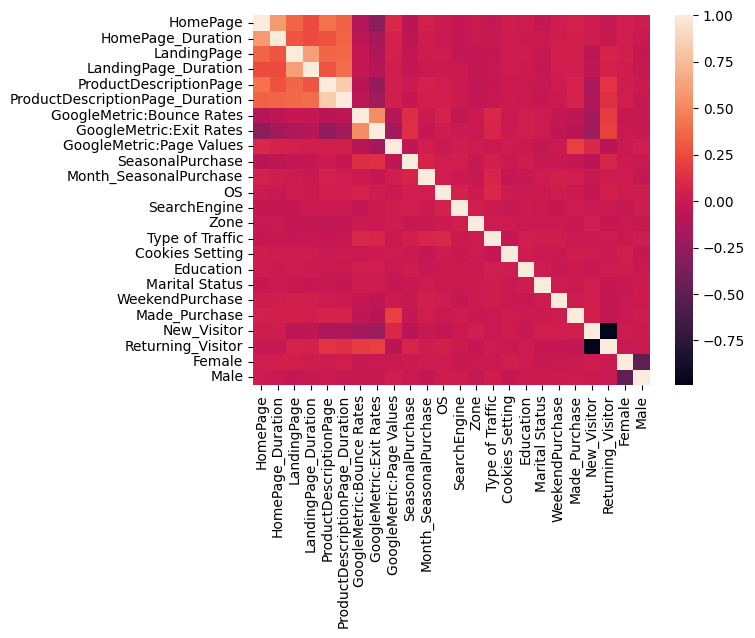

In [94]:
sns.heatmap(m)

Correlations are in general quite poor. The highest ones can be seen in the upper left corner of the heatmap, the first 6 columns display better correlation with each other than the rest of the columns.

In [95]:
X=data[['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration', 'ProductDescriptionPage', 'ProductDescriptionPage_Duration', 'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values', 'SeasonalPurchase', 'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'Cookies Setting', 'Education', 'Marital Status', 'WeekendPurchase', 'New_Visitor', 'Returning_Visitor', 'Female', 'Male']]
Y=data['Made_Purchase']

In [96]:
#X=data[[ 'ProductDescriptionPage', 'ProductDescriptionPage_Duration', 'GoogleMetric:Exit Rates', 'SeasonalPurchase', 'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'Cookies Setting', 'Education', 'Marital Status', 'WeekendPurchase', 'New_Visitor', 'Returning_Visitor', 'Female', 'Male']]
#Y=data['Made_Purchase']

In [97]:
trainX,testX,trainy,testy=train_test_split(X,Y,test_size=0.2)

We've prepared the data for running the machine learning algorithms.

In [98]:
#Principal Component Analysis + random forest tryout; PCA code is here more for experimental purposes - this method is not very well suited for our situation
#pca = PCA(n_components=5)
#principalComponents_train = pca.fit_transform(trainX)#not taking PCA as it is lowering the accuracy
#principalComponents_test = pca.fit_transform(testX)
principalComponents_train = (trainX)
principalComponents_test = (testX)

In [99]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
#max_depth makes the difference: lower(5-10) overfitting is reduced, but so is accuracy; leave it at default, accuracy goes up, so does overfitting
random_forest.fit(principalComponents_train, trainy)
#predicting on train data to get train accuracy
Y_prediction = random_forest.predict(principalComponents_train)
#calcuate accuracy
random_forest.score(principalComponents_train, trainy)
acc_random_forest = round(random_forest.score(principalComponents_train, trainy) * 100, 2)
print(acc_random_forest)

86.79


In [100]:
predictions = random_forest.predict(principalComponents_train)
confusion_matrix(trainy, predictions)

array([[6013,  448],
       [ 948, 3155]])

In [101]:
print(metrics.classification_report(trainy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.864     0.931     0.896      6461
           1      0.876     0.769     0.819      4103

    accuracy                          0.868     10564
   macro avg      0.870     0.850     0.857     10564
weighted avg      0.868     0.868     0.866     10564



In [102]:
#random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
#random_forest.fit(principalComponents_test, y_test)
Y_prediction = random_forest.predict(principalComponents_test)
random_forest.score(principalComponents_test, testy)
acc_random_forest_test = round(random_forest.score(principalComponents_test, testy) * 100, 2)
print(acc_random_forest_test)

52.71


In [103]:
predictions = random_forest.predict(principalComponents_test)
confusion_matrix(testy, predictions)

array([[1081,  494],
       [ 755,  311]])

In [104]:
print(metrics.classification_report(testy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.589     0.686     0.634      1575
           1      0.386     0.292     0.332      1066

    accuracy                          0.527      2641
   macro avg      0.488     0.489     0.483      2641
weighted avg      0.507     0.527     0.512      2641



Let's do some hyperparameter tuning for RandomForest. The hyperparameters we're interested in are n_estimators, max_features, max_depth, min_samples_leaf.

In [105]:
random_forest_ht = RandomForestClassifier(n_estimators=100, max_depth= 5, random_state=0)
#max_depth makes the difference: lower(5-10) overfitting is reduced, but so is accuracy; leave it at default, accuracy goes up, so does overfitting. 
random_forest_ht.fit(principalComponents_train, trainy)
#predicting on train data to get train accuracy
Y_prediction = random_forest_ht.predict(principalComponents_train)
#calcuate accuracy
random_forest_ht.score(principalComponents_train, trainy)
acc_random_forest_ht = round(random_forest_ht.score(principalComponents_train, trainy) * 100, 2)
print(acc_random_forest_ht)

67.57


In [106]:
predictions = random_forest_ht.predict(principalComponents_train)
confusion_matrix(trainy, predictions)

array([[6088,  373],
       [3053, 1050]])

In [107]:
print(metrics.classification_report(trainy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.666     0.942     0.780      6461
           1      0.738     0.256     0.380      4103

    accuracy                          0.676     10564
   macro avg      0.702     0.599     0.580     10564
weighted avg      0.694     0.676     0.625     10564



In [108]:
Y_prediction = random_forest_ht.predict(principalComponents_test)
random_forest_ht.score(principalComponents_test, testy)
acc_random_forest_test_ht = round(random_forest_ht.score(principalComponents_test, testy) * 100, 2)
print(acc_random_forest_test_ht)

65.51


In [109]:
predictions = random_forest_ht.predict(principalComponents_test)
confusion_matrix(testy, predictions)

array([[1460,  115],
       [ 796,  270]])

In [110]:
print(metrics.classification_report(testy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.647     0.927     0.762      1575
           1      0.701     0.253     0.372      1066

    accuracy                          0.655      2641
   macro avg      0.674     0.590     0.567      2641
weighted avg      0.669     0.655     0.605      2641



In [111]:
gaussian = GaussianNB()
gaussian.fit(principalComponents_train, trainy)
Y_prediction = gaussian.predict(principalComponents_train)
gaussian.score(principalComponents_train, trainy)
acc_gaussian = round(gaussian.score(principalComponents_train, trainy) * 100, 2)
print(acc_gaussian)

63.57


In [112]:
predictions = gaussian.predict(principalComponents_train)
confusion_matrix(trainy, predictions)

array([[5661,  800],
       [3048, 1055]])

In [113]:
print(metrics.classification_report(trainy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.650     0.876     0.746      6461
           1      0.569     0.257     0.354      4103

    accuracy                          0.636     10564
   macro avg      0.609     0.567     0.550     10564
weighted avg      0.618     0.636     0.594     10564



In [114]:
#gaussian = GaussianNB()
#gaussian.fit(principalComponents_test, y_test)
Y_prediction = gaussian.predict(principalComponents_test)
gaussian.score(principalComponents_test, testy)
acc_gaussian_test = round(gaussian.score(principalComponents_test, testy) * 100, 2)
print(acc_gaussian_test)

64.45


In [115]:
predictions = gaussian.predict(principalComponents_test)
confusion_matrix(testy, predictions)

array([[1406,  169],
       [ 770,  296]])

In [116]:
print(metrics.classification_report(testy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.646     0.893     0.750      1575
           1      0.637     0.278     0.387      1066

    accuracy                          0.644      2641
   macro avg      0.641     0.585     0.568      2641
weighted avg      0.642     0.644     0.603      2641



We'll now attempt hyperparameter tuning on GaussianNB. The only (hyper)parameter of interest in this case is var_smoothing. 

In [117]:
gaussian_ht = GaussianNB(var_smoothing = 1e-11) #var_smoothing default value is 1e-9
gaussian_ht.fit(principalComponents_train, trainy)
Y_prediction = gaussian_ht.predict(principalComponents_train)
gaussian_ht.score(principalComponents_train, trainy)
acc_gaussian_ht = round(gaussian_ht.score(principalComponents_train, trainy) * 100, 2)
print(acc_gaussian_ht)

63.57


In [118]:
predictions = gaussian_ht.predict(principalComponents_train)
confusion_matrix(trainy, predictions)

array([[5661,  800],
       [3048, 1055]])

In [119]:
print(metrics.classification_report(trainy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.650     0.876     0.746      6461
           1      0.569     0.257     0.354      4103

    accuracy                          0.636     10564
   macro avg      0.609     0.567     0.550     10564
weighted avg      0.618     0.636     0.594     10564



In [120]:
Y_prediction = gaussian_ht.predict(principalComponents_test)
gaussian_ht.score(principalComponents_test, testy)
acc_gaussian_test_ht = round(gaussian_ht.score(principalComponents_test, testy) * 100, 2)
print(acc_gaussian_test_ht)

64.45


In [121]:
predictions = gaussian_ht.predict(principalComponents_test)
confusion_matrix(testy, predictions)

array([[1406,  169],
       [ 770,  296]])

In [122]:
print(metrics.classification_report(testy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.646     0.893     0.750      1575
           1      0.637     0.278     0.387      1066

    accuracy                          0.644      2641
   macro avg      0.641     0.585     0.568      2641
weighted avg      0.642     0.644     0.603      2641



In [123]:
logreg = LogisticRegression()
logreg.fit(principalComponents_train, trainy)
Y_pred = logreg.predict(principalComponents_train)
acc_log = round(logreg.score(principalComponents_train, trainy) * 100, 2)
print(acc_log)

65.34


In [124]:
predictions = logreg.predict(principalComponents_train)
confusion_matrix(trainy, predictions)

array([[6218,  243],
       [3419,  684]])

In [125]:
print(metrics.classification_report(trainy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.645     0.962     0.773      6461
           1      0.738     0.167     0.272      4103

    accuracy                          0.653     10564
   macro avg      0.692     0.565     0.522     10564
weighted avg      0.681     0.653     0.578     10564



In [126]:
#logreg = LogisticRegression()
#logreg.fit(principalComponents_test, y_test)
Y_pred = logreg.predict(principalComponents_test)
acc_log_test = round(logreg.score(principalComponents_test, testy) * 100, 2)
print(acc_log_test)

64.07


In [127]:
predictions = logreg.predict(principalComponents_test)
confusion_matrix(testy, predictions)

array([[1513,   62],
       [ 887,  179]])

In [128]:
print(metrics.classification_report(testy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.630     0.961     0.761      1575
           1      0.743     0.168     0.274      1066

    accuracy                          0.641      2641
   macro avg      0.687     0.564     0.518      2641
weighted avg      0.676     0.641     0.565      2641



In [129]:
logreg_ht = LogisticRegression(solver='saga', random_state=1) #For our purposes changing the solver (fcn. used in optimization) could be interesting; only minor changes observed
logreg_ht.fit(principalComponents_train, trainy)
Y_pred = logreg_ht.predict(principalComponents_train)
acc_log_ht = round(logreg_ht.score(principalComponents_train, trainy) * 100, 2)
print(acc_log_ht)

65.37


In [130]:
predictions = logreg_ht.predict(principalComponents_train)
confusion_matrix(trainy, predictions)

array([[6221,  240],
       [3418,  685]])

In [131]:
print(metrics.classification_report(trainy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.645     0.963     0.773      6461
           1      0.741     0.167     0.272      4103

    accuracy                          0.654     10564
   macro avg      0.693     0.565     0.523     10564
weighted avg      0.682     0.654     0.578     10564



In [132]:
Y_pred = logreg_ht.predict(principalComponents_test)
acc_log_test_ht = round(logreg_ht.score(principalComponents_test, testy) * 100, 2)
print(acc_log_test_ht)

63.95


In [133]:
predictions = logreg_ht.predict(principalComponents_test)
confusion_matrix(testy, predictions)

array([[1513,   62],
       [ 890,  176]])

In [134]:
print(metrics.classification_report(testy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.630     0.961     0.761      1575
           1      0.739     0.165     0.270      1066

    accuracy                          0.640      2641
   macro avg      0.685     0.563     0.515      2641
weighted avg      0.674     0.640     0.563      2641



In [135]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(principalComponents_train,trainy)
Y_pred=decisiontree.predict(principalComponents_train)
acc_dt=round(decisiontree.score(principalComponents_train, trainy) * 100, 2)
print(acc_dt)

86.79


In [136]:
predictions = decisiontree.predict(principalComponents_train)
confusion_matrix(trainy, predictions)

array([[6442,   19],
       [1377, 2726]])

In [137]:
print(metrics.classification_report(trainy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.824     0.997     0.902      6461
           1      0.993     0.664     0.796      4103

    accuracy                          0.868     10564
   macro avg      0.908     0.831     0.849     10564
weighted avg      0.890     0.868     0.861     10564



In [138]:
#decisiontree=DecisionTreeClassifier()
#decisiontree.fit(principalComponents_test,y_test)
Y_pred=decisiontree.predict(principalComponents_test)
acc_dt_test=round(decisiontree.score(principalComponents_test, testy) * 100, 2)
print(acc_dt_test)

48.09


In [139]:
predictions = decisiontree.predict(principalComponents_test)
confusion_matrix(testy, predictions)

array([[953, 622],
       [749, 317]])

In [140]:
print(metrics.classification_report(testy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.560     0.605     0.582      1575
           1      0.338     0.297     0.316      1066

    accuracy                          0.481      2641
   macro avg      0.449     0.451     0.449      2641
weighted avg      0.470     0.481     0.474      2641



In [141]:
decisiontree_ht=DecisionTreeClassifier(max_depth=5)
decisiontree_ht.fit(principalComponents_train,trainy)
Y_pred=decisiontree_ht.predict(principalComponents_train)
acc_dt_ht=round(decisiontree_ht.score(principalComponents_train, trainy) * 100, 2)
print(acc_dt_ht)

67.56


In [142]:
predictions = decisiontree_ht.predict(principalComponents_train)
confusion_matrix(trainy, predictions)

array([[6022,  439],
       [2988, 1115]])

In [143]:
print(metrics.classification_report(trainy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.668     0.932     0.778      6461
           1      0.718     0.272     0.394      4103

    accuracy                          0.676     10564
   macro avg      0.693     0.602     0.586     10564
weighted avg      0.687     0.676     0.629     10564



In [144]:
Y_pred=decisiontree_ht.predict(principalComponents_test)
acc_dt_test_ht=round(decisiontree_ht.score(principalComponents_test, testy) * 100, 2)
print(acc_dt_test_ht)

66.07


In [145]:
predictions = decisiontree_ht.predict(principalComponents_test)
confusion_matrix(testy, predictions)

array([[1448,  127],
       [ 769,  297]])

In [146]:
print(metrics.classification_report(testy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.653     0.919     0.764      1575
           1      0.700     0.279     0.399      1066

    accuracy                          0.661      2641
   macro avg      0.677     0.599     0.581      2641
weighted avg      0.672     0.661     0.616      2641



In [147]:
svc=LinearSVC()
svc.fit(principalComponents_train,trainy)
Y_pred=svc.predict(principalComponents_train)
acc_svc=round(svc.score(principalComponents_train, trainy) * 100, 2)
print(acc_svc)


65.48


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [148]:
predictions = svc.predict(principalComponents_train)
confusion_matrix(trainy, predictions)

array([[6197,  264],
       [3383,  720]])

In [149]:
print(metrics.classification_report(trainy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.647     0.959     0.773      6461
           1      0.732     0.175     0.283      4103

    accuracy                          0.655     10564
   macro avg      0.689     0.567     0.528     10564
weighted avg      0.680     0.655     0.582     10564



In [150]:
#svc=LinearSVC()
#svc.fit(principalComponents_test,y_test)
Y_pred=svc.predict(principalComponents_test)
acc_svc_test=round(svc.score(principalComponents_test, testy) * 100, 2)
print(acc_svc_test)

64.1


In [151]:
predictions = svc.predict(principalComponents_test)
confusion_matrix(testy, predictions)

array([[1511,   64],
       [ 884,  182]])

In [152]:
print(metrics.classification_report(testy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.631     0.959     0.761      1575
           1      0.740     0.171     0.277      1066

    accuracy                          0.641      2641
   macro avg      0.685     0.565     0.519      2641
weighted avg      0.675     0.641     0.566      2641



In [153]:
svc_ht=LinearSVC(max_iter=500) #the hyperparameter of interest; default value is 1000
svc_ht.fit(principalComponents_train,trainy)
Y_pred=svc_ht.predict(principalComponents_train)
acc_svc_ht=round(svc_ht.score(principalComponents_train, trainy) * 100, 2)
print(acc_svc_ht)

65.48


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [154]:
predictions = svc_ht.predict(principalComponents_train)
confusion_matrix(trainy, predictions)

array([[6197,  264],
       [3383,  720]])

In [155]:
print(metrics.classification_report(trainy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.647     0.959     0.773      6461
           1      0.732     0.175     0.283      4103

    accuracy                          0.655     10564
   macro avg      0.689     0.567     0.528     10564
weighted avg      0.680     0.655     0.582     10564



In [156]:
Y_pred=svc_ht.predict(principalComponents_test)
acc_svc_test_ht=round(svc_ht.score(principalComponents_test, testy) * 100, 2)
print(acc_svc_test_ht)

64.1


In [157]:
predictions = svc_ht.predict(principalComponents_test)
confusion_matrix(testy, predictions)

array([[1511,   64],
       [ 884,  182]])

In [158]:
print(metrics.classification_report(testy, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.631     0.959     0.761      1575
           1      0.740     0.171     0.277      1066

    accuracy                          0.641      2641
   macro avg      0.685     0.565     0.519      2641
weighted avg      0.675     0.641     0.566      2641



In [159]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'GaussianNB',
              'Decision Tree',
              'LinearSVC'
              ],
    'training_accuracy': [ acc_log, acc_random_forest, acc_gaussian, acc_dt ,acc_svc ],
    'test_accuracy':[acc_log_test, acc_random_forest_test, acc_gaussian_test, acc_dt_test ,acc_svc_test ],
    'training_accuracy_after_tuning':[acc_log_ht, acc_random_forest_ht, acc_gaussian_ht,acc_dt_ht,acc_svc_ht],
    'test_accuracy_after_tuning':[acc_log_test_ht, acc_random_forest_test_ht, acc_gaussian_test_ht, acc_dt_test_ht, acc_svc_test_ht]})
result_df = results.sort_values(by='training_accuracy', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)
#2 columns, training accuracy, test accuracy, 

,training_accuracy,test_accuracy,training_accuracy_after_tuning,test_accuracy_after_tuning
Model,,,,
Random Forest,86.79,52.71,67.57,65.51
Decision Tree,86.79,48.09,67.56,66.07
LinearSVC,65.48,64.10,65.48,64.10
Logistic Regression,65.34,64.07,65.37,63.95
GaussianNB,63.57,64.45,63.57,64.45


This is our summary for the results of the performance of our machine learning algorithms. Do keep in mind that accuracy isn't everything, one should pay attention to precision and recall too, for example, and with those metrics we have seen some mixed results. As we can see, hyperparameter tuning has helped with overfitting in the case of the Random forest and Decision Tree algorithms.

In [160]:
import tensorflow as tf
normalizer = tf.keras.layers.Normalization(axis=-1) #equivalent to StandardScaler. Might as well.
normalizer.adapt(trainX)
numeric_dataset = tf.data.Dataset.from_tensor_slices((trainX, trainy))


2024-02-14 14:42:02.481014: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-14 14:42:02.481047: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-14 14:42:02.482186: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-14 14:42:02.488270: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-14 14:42:04.155503: I external/local_xla/xla/

In [161]:
def get_basic_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [162]:
numeric_batches = numeric_dataset.shuffle(1000).batch(8)


model = get_basic_model()
model.fit(numeric_batches, epochs=100)

Epoch 1/100


2024-02-14 14:42:05.700049: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fe98c688bb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-14 14:42:05.700086: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-02-14 14:42:05.704120: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-14 14:42:05.719686: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
I0000 00:00:1707921725.769428    7271 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1321/1321 [==============================] - 4s 2ms/step - loss: 0.6687 - accuracy: 0.6116
Epoch 2/100
1321/1321 [==============================] - 3s 2ms/step - loss: 0.6636 - accuracy: 0.6116
Epoch 3/100
1321/1321 [==============================] - 3s 2ms/step - loss: 0.6540 - accuracy: 0.6193
Epoch 4/100
1321/1321 [==============================] - 3s 2ms/step - loss: 0.6447 - accuracy: 0.6352
Epoch 5/100
1321/1321 [==============================] - 3s 2ms/step - loss: 0.6406 - accuracy: 0.6455
Epoch 6/100
1321/1321 [==============================] - 3s 2ms/step - loss: 0.6392 - accuracy: 0.6453
Epoch 7/100
1321/1321 [==============================] - 3s 2ms/step - loss: 0.6378 - accuracy: 0.6494
Epoch 8/100
1321/1321 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.6506
Epoch 9/100
1321/1321 [==============================] - 3s 2ms/step - loss: 0.6362 - accuracy: 0.6502
Epoch 10/100
1321/1321 [==============================] - 3s 2ms/step - loss: 0.6350 

In [163]:
model.evaluate(testX, testy, verbose=2)

83/83 - 0s - loss: 0.6482 - accuracy: 0.6395 - 153ms/epoch - 2ms/step


[0.6482344269752502, 0.6395304799079895]

Not a significantly different result from what we obtained before with simple logistic regression. Using or not using the normalizer layer didn't lead to any significant changes. Changing one of the relu activations with a sigmoid also didn't lead to significant changes in terms of accuracy.